# Assignment: Implementing Gradient Descent and Stochastic Gradient Descent

## Understanding Different Types of Gradient Descent
### Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent updates the model parameters using only one randomly chosen data point per iteration. 

This makes it computationally efficient and allows it to escape local minima, but it can be noisy and less stable compared to other methods. 

The randomness in the updates introduces variance, which can sometimes help in finding a better solution, but may also slow down convergence or cause oscillations.

Mathematically, the update rule for SGD is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J_i(\theta) $$
where:
- $\theta$ represents the parameters
- $\alpha$ is the learning rate
- $\nabla J_i(\theta)$ is the gradient computed using a single data point $$ i $$


### Mini-Batch Gradient Descent
Mini-Batch Gradient Descent is a compromise between batch and stochastic gradient descent. Instead of using the entire dataset or a single data point, it updates the parameters using a small batch of randomly selected data points. This balances stability and efficiency, making it a commonly used approach in deep learning. Mini-batch gradient descent helps smooth out some of the noise of SGD while still being computationally efficient. The batch size is a hyperparameter that affects convergence speed and accuracy.

The update rule for mini-batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} \nabla J_i(\theta) $$
where:
- $m$ is the mini-batch size
- $\sum_{i=1}^{m} \nabla J_i(\theta)$ represents the gradient computed over a batch of $m$ data points

### Batch Gradient Descent (Vanilla)
Batch Gradient Descent computes the gradient using the entire dataset at each iteration. 

While this method leads to a smooth convergence, it is computationally expensive, especially for large datasets. 

It tends to be more stable and can find the optimal solution efficiently, but it may take longer compared to SGD and Mini-Batch Gradient Descent.

The update rule for batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J(\theta) $$
where:
- $\nabla J(\theta)$ is the gradient computed over the entire dataset

## Task 1: Implement Gradient Descent for a Quadratic Function
1. Define a quadratic function, e.g., $$ f(x) = x^2 $$.
2. Implement a gradient descent to minimize this function.
3. Use different learning rates and visualize the convergence.
4. Plot the function and the gradient descent path.
5. Plot the evolution of loss across iterations

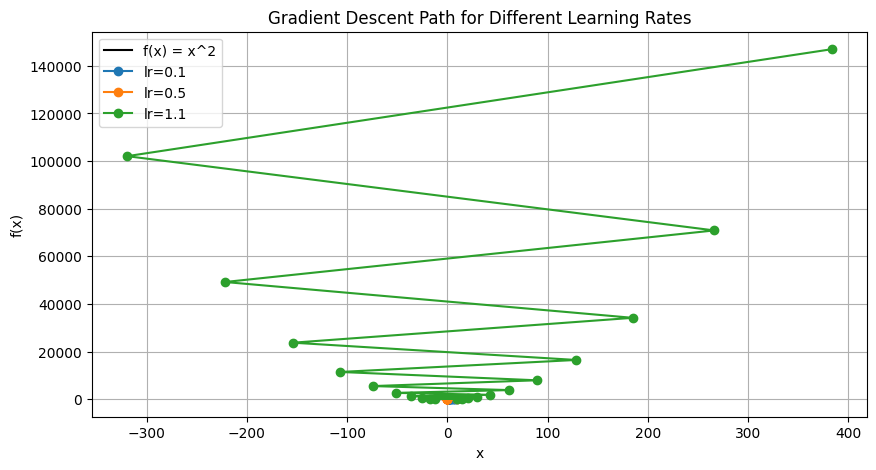

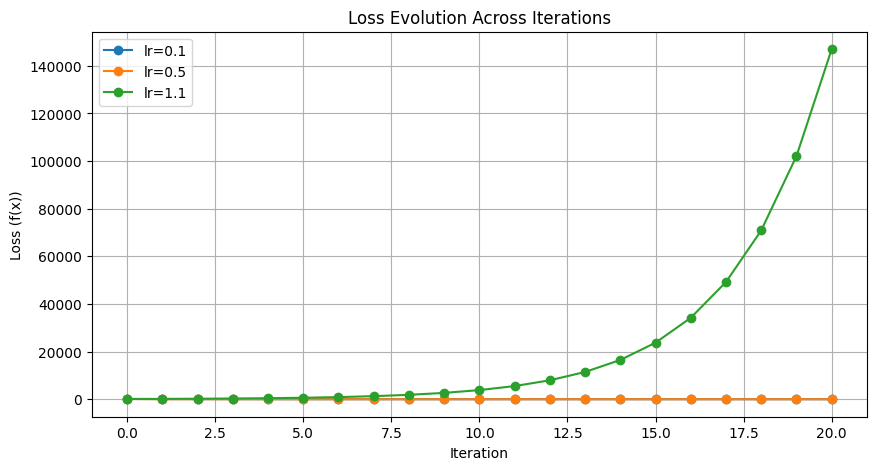

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function and its derivative
def f(x):
    return x**2

def gradient(x):
    return 2*x

# Gradient Descent Implementation
def gradient_descent(learning_rate, iterations, initial_x):
    x = initial_x
    history = [x]  # Store values for visualization
    
    for _ in range(iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        history.append(x)
    
    return history

# Parameters
learning_rates = [0.1, 0.5, 1.1]  # Different learning rates to observe behavior
iterations = 20
initial_x = 10  # Starting point
x_vals = np.linspace(-12, 12, 100)

# Plot function
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f(x_vals), label='f(x) = x^2', color='black')

# Run and plot gradient descent for different learning rates
for lr in learning_rates:
    history = gradient_descent(lr, iterations, initial_x)
    plt.plot(history, f(np.array(history)), marker='o', label=f'lr={lr}')
    
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Path for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

# Plot loss evolution
plt.figure(figsize=(10, 5))
for lr in learning_rates:
    history = gradient_descent(lr, iterations, initial_x)
    losses = [f(x) for x in history]
    plt.plot(range(len(losses)), losses, marker='o', label=f'lr={lr}')
    
plt.xlabel('Iteration')
plt.ylabel('Loss (f(x))')
plt.title('Loss Evolution Across Iterations')
plt.legend()
plt.grid()
plt.show()

## Task 2: Gradient Descent in Higher Dimensions
1. Define a function like $$ f(x, y) = x^2 + y^2 $$.
2. Implement gradient descent for two variables.
3. Visualize the contour plot and the optimization path.
4. Experiment with different initialization points and learning rates.

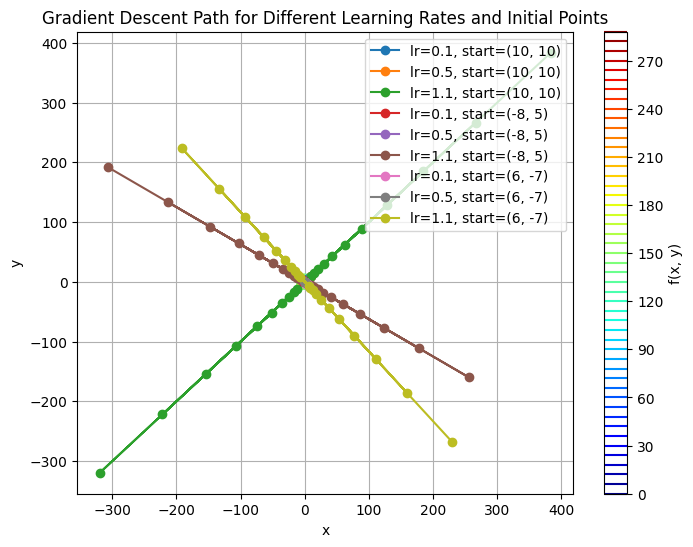

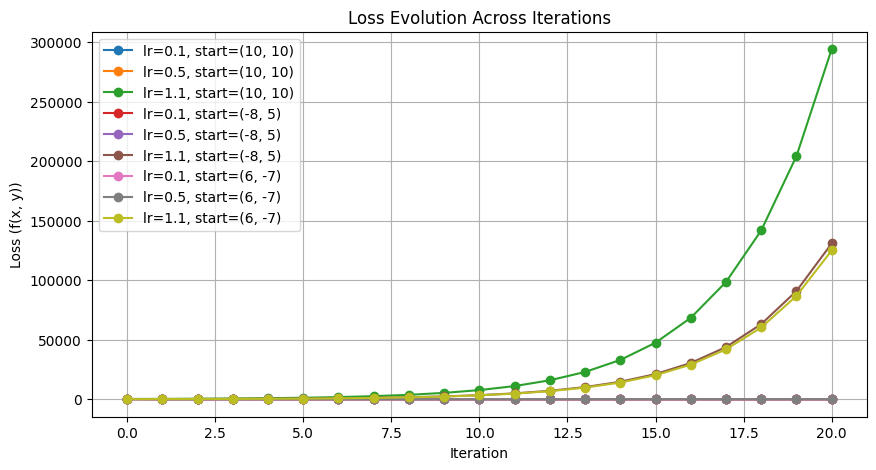

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function and its gradient
def f(x, y):
    return x**2 + y**2

def gradient(x, y):
    return np.array([2*x, 2*y])

# Gradient Descent Implementation for Two Variables
def gradient_descent(learning_rate, iterations, initial_point):
    x, y = initial_point
    history = [(x, y)]  # Store values for visualization
    
    for _ in range(iterations):
        grad = gradient(x, y)
        x, y = x - learning_rate * grad[0], y - learning_rate * grad[1]
        history.append((x, y))
    
    return np.array(history)

# Parameters
learning_rates = [0.1, 0.5, 1.1]  # Different learning rates to observe behavior
iterations = 20
initial_points = [(10, 10), (-8, 5), (6, -7)]  # Different starting points

# Generate contour plot
x_vals = np.linspace(-12, 12, 100)
y_vals = np.linspace(-12, 12, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.colorbar(label='f(x, y)')

# Run and plot gradient descent for different learning rates and starting points
for initial_point in initial_points:
    for lr in learning_rates:
        history = gradient_descent(lr, iterations, initial_point)
        plt.plot(history[:, 0], history[:, 1], marker='o', label=f'lr={lr}, start={initial_point}')
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Path for Different Learning Rates and Initial Points')
plt.legend()
plt.grid()
plt.show()

# Plot loss evolution
plt.figure(figsize=(10, 5))
for initial_point in initial_points:
    for lr in learning_rates:
        history = gradient_descent(lr, iterations, initial_point)
        losses = [f(x, y) for x, y in history]
        plt.plot(range(len(losses)), losses, marker='o', label=f'lr={lr}, start={initial_point}')
    
plt.xlabel('Iteration')
plt.ylabel('Loss (f(x, y))')
plt.title('Loss Evolution Across Iterations')
plt.legend()
plt.grid()
plt.show()

## Task 3: Implement Stochastic Gradient Descent (SGD)
1. Generate a synthetic dataset : $$ y = 3x + 5 + \text{noise} $$.
2. Run gradient descent for linear regression.
3. Run stochastic gradient descent and compare results.
4. Plot the regression line and analyze the difference in convergence speed.

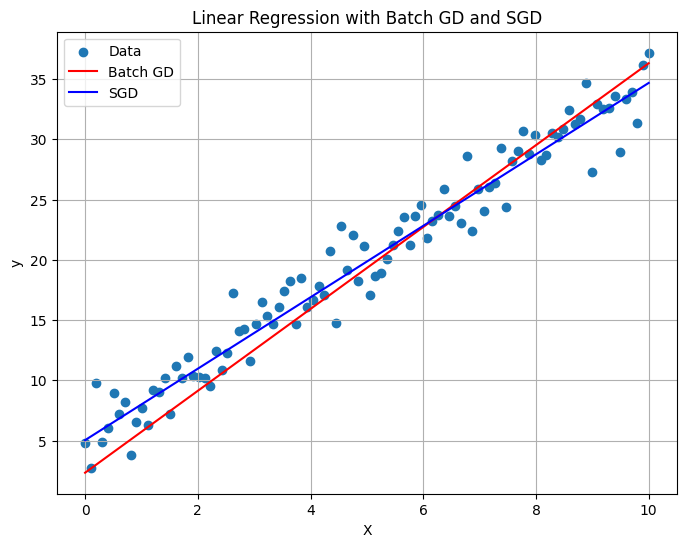

In [3]:
# Generate synthetic dataset
def generate_data(n=100):
    X = np.linspace(0, 10, n)
    y = 3 * X + 5 + np.random.randn(n) * 2  # Adding noise
    return X, y

# Compute gradient for linear regression
def compute_gradient(X, y, w, b):
    n = len(X)
    y_pred = w * X + b
    error = y_pred - y
    grad_w = (2/n) * np.sum(error * X)
    grad_b = (2/n) * np.sum(error)
    return grad_w, grad_b

# Batch Gradient Descent for Linear Regression
def batch_gradient_descent(X, y, lr=0.01, epochs=100):
    w, b = 0, 0
    history = []
    for _ in range(epochs):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= lr * grad_w
        b -= lr * grad_b
        history.append((w, b))
    return w, b, history

# Stochastic Gradient Descent for Linear Regression
def stochastic_gradient_descent(X, y, lr=0.01, epochs=100):
    w, b = 0, 0
    history = []
    n = len(X)
    for _ in range(epochs):
        for i in range(n):
            grad_w = 2 * (w * X[i] + b - y[i]) * X[i]
            grad_b = 2 * (w * X[i] + b - y[i])
            w -= lr * grad_w
            b -= lr * grad_b
            history.append((w, b))
    return w, b, history

# Generate data
X, y = generate_data()

# Run both methods
w_batch, b_batch, history_batch = batch_gradient_descent(X, y)
w_sgd, b_sgd, history_sgd = stochastic_gradient_descent(X, y)

# Plot regression results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, w_batch * X + b_batch, label='Batch GD', color='red')
plt.plot(X, w_sgd * X + b_sgd, label='SGD', color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Batch GD and SGD')
plt.legend()
plt.grid()
plt.show()


### Task 4
1. Define the multimodal function $$f(x, y) = (x^2 + y^2) * sin(x) * sin(y) + x^2 + y^2$$.
2. Visualize the 3D surface plot as well as the contour plot.
3. What could be a problem for convergence of the algorithm here ?
5. Run the gradient descent algorithm with different initial values and learning rates.
7. Add the optimization path to the contour plot for each initial value.
8. Compare the performance path of gradient descent and stochastic gradient descent for each initial value.



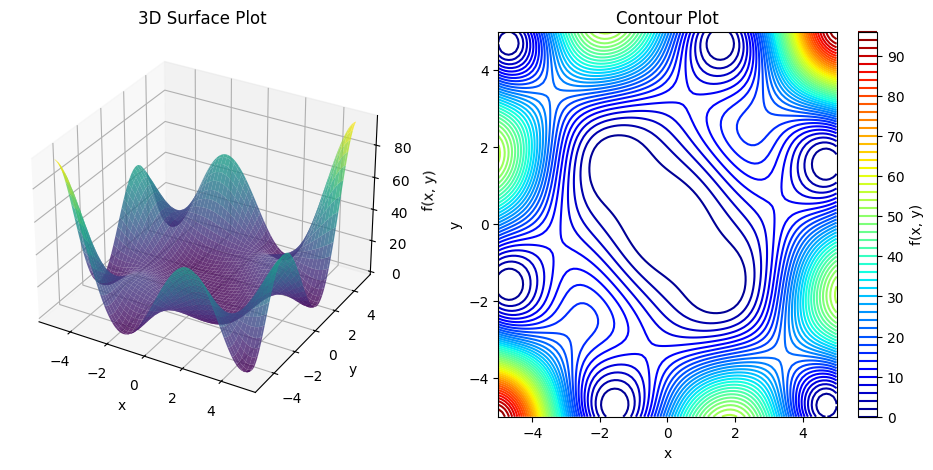

C:\Users\Erasyl\AppData\Local\Temp\ipykernel_24628\1713243063.py:10: RuntimeWarning: overflow encountered in scalar power
  df_dx = (2*x * np.sin(x) * np.sin(y)) + ((x**2 + y**2) * np.cos(x) * np.sin(y)) + 2*x
C:\Users\Erasyl\AppData\Local\Temp\ipykernel_24628\1713243063.py:11: RuntimeWarning: overflow encountered in scalar power
  df_dy = (2*y * np.sin(x) * np.sin(y)) + ((x**2 + y**2) * np.sin(x) * np.cos(y)) + 2*y
C:\Users\Erasyl\AppData\Local\Temp\ipykernel_24628\1713243063.py:10: RuntimeWarning: invalid value encountered in sin
  df_dx = (2*x * np.sin(x) * np.sin(y)) + ((x**2 + y**2) * np.cos(x) * np.sin(y)) + 2*x
C:\Users\Erasyl\AppData\Local\Temp\ipykernel_24628\1713243063.py:10: RuntimeWarning: invalid value encountered in cos
  df_dx = (2*x * np.sin(x) * np.sin(y)) + ((x**2 + y**2) * np.cos(x) * np.sin(y)) + 2*x
C:\Users\Erasyl\AppData\Local\Temp\ipykernel_24628\1713243063.py:11: RuntimeWarning: invalid value encountered in sin
  df_dy = (2*y * np.sin(x) * np.sin(y)) + ((x**2 +

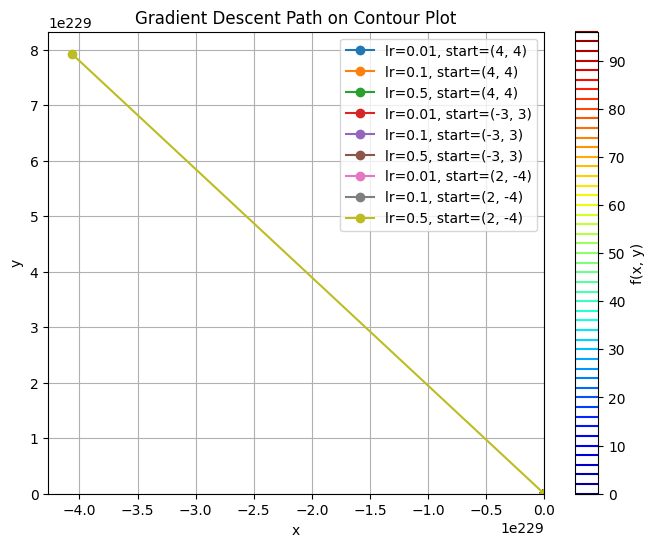

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the multimodal function and its gradient
def f(x, y):
    return (x**2 + y**2) * np.sin(x) * np.sin(y) + x**2 + y**2

def gradient(x, y):
    df_dx = (2*x * np.sin(x) * np.sin(y)) + ((x**2 + y**2) * np.cos(x) * np.sin(y)) + 2*x
    df_dy = (2*y * np.sin(x) * np.sin(y)) + ((x**2 + y**2) * np.sin(x) * np.cos(y)) + 2*y
    return np.array([df_dx, df_dy])

# Gradient Descent Implementation
def gradient_descent(learning_rate, iterations, initial_point):
    x, y = initial_point
    history = [(x, y)]
    for _ in range(iterations):
        grad = gradient(x, y)
        x, y = x - learning_rate * grad[0], y - learning_rate * grad[1]
        history.append((x, y))
    return np.array(history)

# Generate surface and contour plot
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# 3D Surface Plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Surface Plot')

# Contour Plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=50, cmap='jet')
plt.colorbar(contour, ax=ax2, label='f(x, y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot')
plt.show()

# Parameters
learning_rates = [0.01, 0.1, 0.5]
iterations = 50
initial_points = [(4, 4), (-3, 3), (2, -4)]

# Run and plot gradient descent for different learning rates and starting points
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.colorbar(label='f(x, y)')
for initial_point in initial_points:
    for lr in learning_rates:
        history = gradient_descent(lr, iterations, initial_point)
        plt.plot(history[:, 0], history[:, 1], marker='o', label=f'lr={lr}, start={initial_point}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Path on Contour Plot')
plt.legend()
plt.grid()
plt.show()


## SKlearn regressions library

- Take one dataset we already used for previous weeks. 
- Prepare data to train a model
- Fit a linear regression with OLS method
- Fit a linear regression with gradient descent (look at sklearn documentation to do so)
- Compare and explain the results

MSE OLS: 4.1012
MSE SGD: 207364798412824869076992.0000


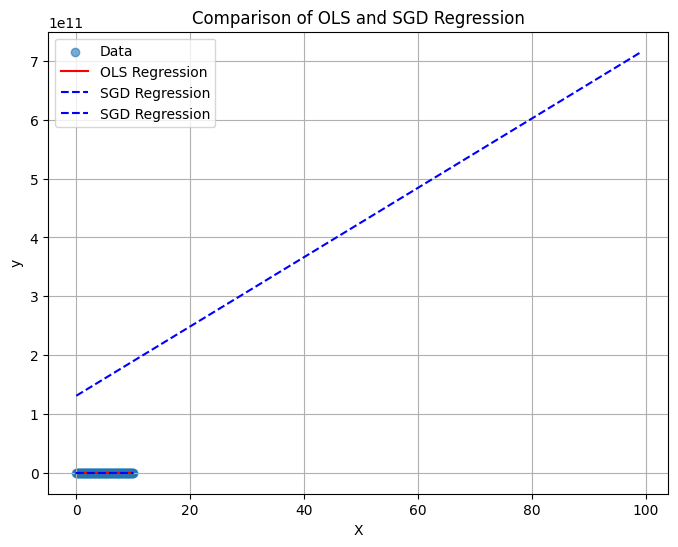

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
def generate_data(n=100):
    X = np.linspace(0, 10, n).reshape(-1, 1)
    y = 3 * X.squeeze() + 5 + np.random.randn(n) * 2  # Adding noise
    return X, y

# Load dataset
X, y = generate_data()

# Fit Linear Regression using OLS (Ordinary Least Squares)
ols_model = LinearRegression()
ols_model.fit(X, y)
y_pred_ols = ols_model.predict(X)

# Fit Linear Regression using Gradient Descent (SGDRegressor)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sgd_model = SGDRegressor(max_iter=1000, learning_rate='optimal', eta0=0.01)
sgd_model.fit(X_scaled, y)
y_pred_sgd = sgd_model.predict(X_scaled)

# Compare Results
mse_ols = mean_squared_error(y, y_pred_ols)
mse_sgd = mean_squared_error(y, y_pred_sgd)

print(f'MSE OLS: {mse_ols:.4f}')
print(f'MSE SGD: {mse_sgd:.4f}')

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data', alpha=0.6)
plt.plot(X, y_pred_ols, label='OLS Regression', color='red')
plt.plot(X, scaler.inverse_transform(X_scaled), y_pred_sgd, label='SGD Regression', color='blue', linestyle='dashed')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of OLS and SGD Regression')
plt.legend()
plt.grid()
plt.show()